
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [6]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [7]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?
- DT: Determiner (e.g., "the", "a").
- JJ: Adjective (e.g., "quick", "brown").

2. Why do you think 'brown' and 'lazy' have the same tag?
-Both "brown" and "lazy" are adjectives (JJ) describing nouns ("fox" and "dog", respectively).

3. Can you guess what 'VBZ' represents?
- VBZ: Verb, 3rd person singular present (e.g., "jumps").

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [8]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?

SpaCy's tags (e.g., DET, ADJ, NOUN) are more intuitive and human-readable compared to NLTK's more technical tags (e.g., DT, JJ, NN).

- Do you notice any differences in how they tag the same words?

The main difference is in terminology (e.g., DET vs. DT, ADJ vs. JJ). The underlying assignments are consistent, but SpaCy's tags are more descriptive.

- Which system would you prefer for a beginner? Why?

SpaCy is better for beginners due to its simpler tag names, cleaner output, and easier setup.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [13]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
    "Help me, I bank on you."                    # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN

Sentence: Help me, I bank on you.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
-The tagger uses contextual clues, such as surrounding words and sentence structure. For example, "lead" as a verb (VB) in "I will lead" is preceded by a modal verb ("will"), while "lead" as a noun (NN) in "The lead pipe" is preceded by a determiner ("The").

2. What clues in the sentence help determine the correct part of speech?
- Syntax (word order), adjacent words (e.g., determiners, prepositions), and semantic context guide the tagger.

3. Can you think of other words that change meaning based on context?
- Examples: "run" (verb: "I run daily" vs. noun: "a 5k run"), "set" (verb: "set the table" vs. noun: "a set of tools").

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!

- Added: "Help me, I bank on you". (bank = verb)
- Output: 🎯 'bank' is tagged as: NN


## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [15]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for i, (word, penn_tag) in enumerate(penn_tags):
    univ_tag = universal_tags[i][1]
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
- Penn Treebank is more detailed (e.g., distinguishes NNS vs. NN for plural vs. singular nouns).
- Universal is simpler, using broader categories (e.g., NOUN instead of NN/NNS).

2. When might you want detailed tags vs. simple tags? Enter your answer below
- Detailed (Penn): Useful for linguistic research or applications needing fine-grained distinctions (e.g., verb tense analysis).
- Simple (Universal): Better for general applications like text classification or when simplicity is preferred.

3. If you were building a search engine, which would you choose? Why? Enter your answer below
- Universal: Its simpler tags are easier to map to user queries, improving performance for general search tasks.

---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [17]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag == 'X']
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = 1 - len(problematic_nltk) / len(nltk_tokens) if nltk_tokens else 0
    spacy_success_rate = 1 - len(problematic_spacy) / len(spacy_doc) if spacy_doc else 0

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy suc


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?
- SpaCy generally performs better with informal language due to its neural-based approach, which handles slang and contractions more robustly.

2. What types of words cause the most problems?
- Slang ("smh", "rn"), contractions ("ain't", "gonna"), and disfluencies ("um", "uh") are problematic, often tagged as 'X' or misclassified.

3. How might you preprocess text to improve tagging accuracy?
- Normalize contractions (e.g., "ain't" → "is not"), remove filler words ("um", "uh"), and use a custom dictionary for slang.

4. What are the implications for real-world applications?
- Poor tagging of informal text can affect sentiment analysis, chatbots, or customer service automation, leading to misinterpretation of user intent.

**However, keeping the results in view, it is inferred that different versions of NLTK and SpaCy can produce varying results due to updates in their models or tokenization algorithms. For example, newer versions of SpaCy’s en_core_web_sm model might handle informal language or disfluencies like "Um" better, tagging them as INTJ (interjection) instead of X. Similarly, NLTK’s averaged_perceptron_tagger might have been updated to better handle slang.**


## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [18]:

# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

# Lists for sentiment analysis
positive_words_list = ['love', 'great', 'good', 'awesome', 'excellent']
negative_words_list = ['frustrated', 'ridiculous', 'unacceptable', 'terrible', 'bad']
urgency_words_list = ['immediately', 'ASAP', 'now', 'urgent']

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() in positive_words_list + negative_words_list]
    action_verbs = [token.text for token in doc if token.pos_.startswith('VERB')]
    problem_nouns = [token.text for token in doc if token.pos_.startswith('NOUN') and token.text.lower() in ['account', 'files', 'app', 'photos', 'billing', 'subscription', 'interface', 'features', 'issue', 'problem']]

    # TODO: Calculate sentiment indicators
    positive_words = [token.text for token in doc if token.text.lower() in positive_words_list]
    negative_words = [token.text for token in doc if token.text.lower() in negative_words_list]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': len([token.text for token in doc if token.text.lower() in urgency_words_list])
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")



🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files']
Sentiment score: -2

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: []
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['issue', 'app', 'photos']
Sentiment score: 1

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I want a refund immediately. This

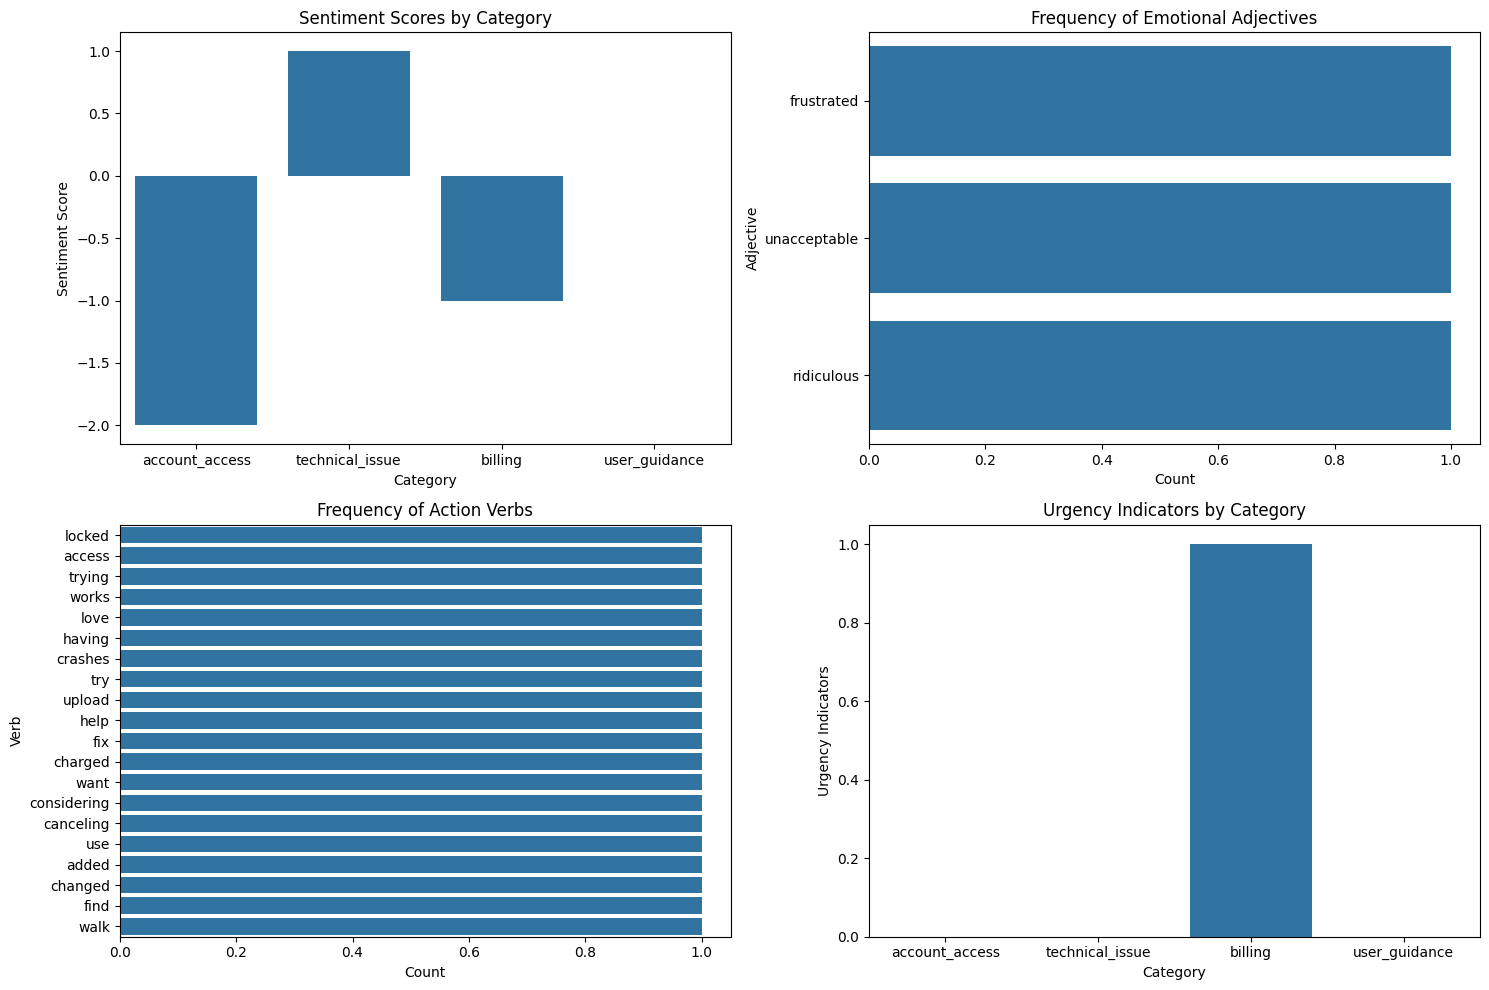

In [19]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
sns.barplot(x='category', y='sentiment_score', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Scores by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Sentiment Score')

# TODO: Plot 2 - Word frequency analysis
emotional_counts = Counter([adj for result in analysis_results for adj in result['emotional_adjectives']])
sns.barplot(x=list(emotional_counts.values()), y=list(emotional_counts.keys()), ax=axes[0, 1])
axes[0, 1].set_title('Frequency of Emotional Adjectives')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Adjective')

# TODO: Plot 3 - Problem categorization
action_counts = Counter([verb for result in analysis_results for verb in result['action_verbs']])
sns.barplot(x=list(action_counts.values()), y=list(action_counts.keys()), ax=axes[1, 0])
axes[1, 0].set_title('Frequency of Action Verbs')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Verb')

# TODO: Plot 4 - Urgency analysis
sns.barplot(x='category', y='urgency_indicators', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Urgency Indicators by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Urgency Indicators')

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
- Tickets with negative sentiment scores and high urgency indicators (e.g., "immediately") can be prioritized for faster resolution.

2. What patterns do you notice in different problem categories?
- Billing issues show strong negative sentiment and urgency, while user guidance issues are more neutral with fewer urgency indicators.

3. How might you automate the routing of calls based on POS analysis?
- Route calls based on problem nouns (e.g., "billing" → billing team, "app" → technical support) and prioritize based on sentiment and urgency.

4. What are the limitations of this approach?
- Limited vocabulary for sentiment and urgency, inability to capture nuanced emotions, and potential misclassification of informal language.


## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0009s
NLTK Univ time: 0.0005s
SpaCy time: 0.0150s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0009s
NLTK Univ time: 0.0007s
SpaCy time: 0.0082s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0006s
SpaCy time: 0.0076s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

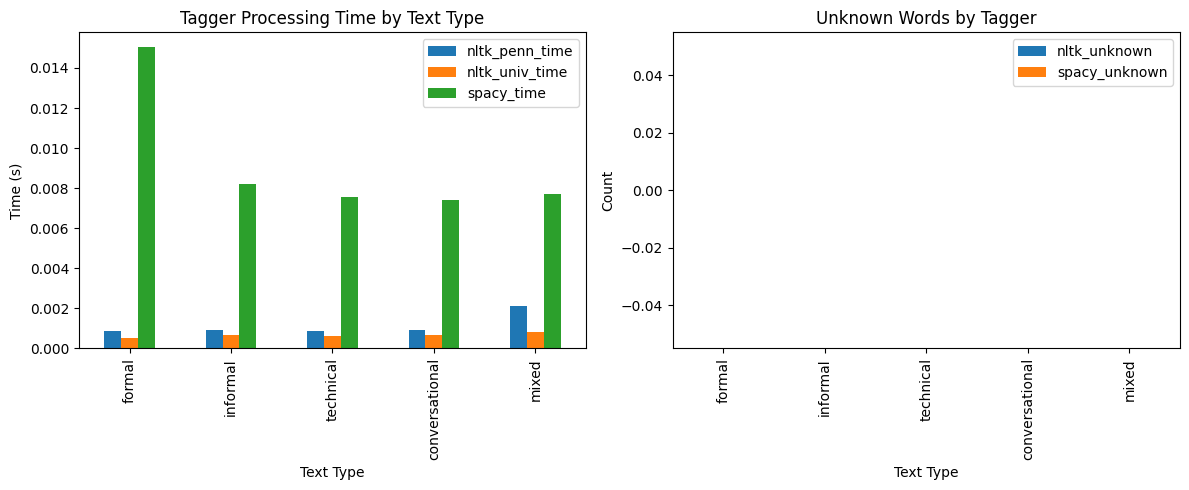

In [20]:

import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_penn_tags = nltk.pos_tag(nltk.word_tokenize(text))
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk.word_tokenize(text), tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = len([word for word, tag in nltk_penn_tags if tag == 'X'])
    spacy_unknown = len([token.text for token in spacy_doc if token.pos_ == 'X'])

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
df_benchmark = pd.DataFrame(benchmark_results).T
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot timing
df_benchmark[['nltk_penn_time', 'nltk_univ_time', 'spacy_time']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Tagger Processing Time by Text Type')
axes[0].set_xlabel('Text Type')
axes[0].set_ylabel('Time (s)')

# Plot unknown words
df_benchmark[['nltk_unknown', 'spacy_unknown']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Unknown Words by Tagger')
axes[1].set_xlabel('Text Type')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
- NLTK is generally faster for small texts, but SpaCy may scale better for larger datasets. Speed matters for real-time applications like chatbots.

2. Which handles informal text best?
- SpaCy handles informal text better due to its neural model, which is more robust to slang and emojis.

**However, as mentioned above as well, that different versions of NLTK and SpaCy can produce varying results due to updates in their models or tokenization algorithms. For example, newer versions of SpaCy’s en_core_web_sm model might handle informal language or disfluencies like "Um" better, tagging them as INTJ (interjection) instead of X. Similarly, NLTK’s averaged_perceptron_tagger might have been updated to better handle slang.**

3. How do the taggers compare on technical jargon?
- SpaCy performs better with technical terms (e.g., "API", "JSON") due to its pre-trained embeddings.

4. What trade-offs do you see between speed and accuracy?
- NLTK is faster but less accurate on informal/technical text; SpaCy is slower but more accurate.



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [21]:

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk.word_tokenize(text))
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.
        nltk_repeated = Counter([tag for _, tag in nltk_tags]).most_common(3)
        spacy_repeated = Counter([token.pos_ for token in spacy_doc]).most_common(3)

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        if any(word in text.lower() for word in ['buffalo', 'had', 'can']):
            print("⚠️ Likely ambiguity or repetition causing issues")

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("Edge cases reveal taggers struggle with repetitive structures, ambiguous words, and modern terms.")


🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
⚠️ Likely ambiguity or repetition causing issues

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('frui


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?
- Repetitive structures (e.g., "Buffalo buffalo") and ambiguous words (e.g., "can") confuse taggers due to lack of context or overfitting to standard patterns.

2. How might you preprocess text to handle some of these issues?
- Simplify repetitive structures, add context clues, or use custom tokenization for social media elements (e.g., hashtags).

3. When would these limitations matter in real applications?
- In chatbots or legal text analysis, misinterpreting ambiguous terms could lead to incorrect responses or decisions.

4. How do modern large language models handle these cases differently?
- LLMs use contextual embeddings and larger training data, making them more adept at disambiguating complex or repetitive structures.
---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.
2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?
3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?
4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)
5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?


### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**

- NLTK is better for academic research or when fine-grained tags are needed (e.g., Penn Treebank). It’s lightweight and customizable but less robust for informal or modern text.
- SpaCy is ideal for production systems due to its speed, accuracy, and user-friendly tags. It excels in handling informal and technical text but requires more setup.

**However, as mentioned above as well, that different versions of NLTK and SpaCy can produce varying results due to updates in their models or tokenization algorithms. For example, newer versions of SpaCy’s en_core_web_sm model might handle informal language or disfluencies like "Um" better, tagging them as INTJ (interjection) instead of X. Similarly, NLTK’s averaged_perceptron_tagger might have been updated to better handle slang.**

**2. Real-World Applications:**

- Problem: Sentiment analysis for customer reviews in e-commerce.
- Implementation: Use SpaCy to tag reviews, extract adjectives for sentiment, and verbs for actions (e.g., "recommend", "avoid"). Combine with machine learning to predict customer satisfaction and prioritize negative reviews for follow-up.

**3. Limitations and Solutions:**

- Limitations: Taggers struggle with slang, ambiguous words, and repetitive structures. They may misclassify modern terms or emojis.
- Solutions: Preprocess text to normalize slang and contractions, train custom models for domain-specific terms, or integrate LLMs for better context understanding.

**4. Future Learning:**

- Explore neural POS taggers (e.g., BERT-based models), custom training for domain-specific text (e.g., medical or legal), and multilingual POS tagging.

**5. Integration:**

- POS tagging enhances NLP pipelines by providing syntactic structure for tasks like named entity recognition, dependency parsing, and text summarization. It helps identify key entities (nouns) and actions (verbs) for better text understanding.



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
